# ESTRATEGIA MOMENTUM

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 9 y 10__

__Gestión de Activos y Carteras__

__CUNEF__

La primera estrategia de optimización de carteras, o modelo de predicción de rendimientos, a estudiar es la estrategia de momentum. De todos los datos proporcionados, esta estrategia utiliza únicamente los datos de rentabilidad a un año de numerosos activos que vemos en los datos importados a continuación.

Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo (la importancia de cada plazo depende del peso que le demos a cada una y será explicada más adelante). El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime as datetime

Importamos los datos que se desean analizar para nuestra cartera.

In [21]:
datos = pd.read_excel('datos.xlsx')
datos = datos.set_index('Symbol')
datos.head()

,Name,Price,Currency,FX Chang,Sector,Country,Rentab 1Y,Volat 30d,Volat 360d,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M,NET_OPERATING_ASSETS,RETURN_ON_INV_CAPITAL,EQY_BETA,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT,NEWS_SENTIMENT
Symbol,,,,,,,,,,,,,,,,,,,,
NESN SW Equity,NESTLE SA-REG,101.32,CHF,0.9402,Food,SWITZERLAND,0.018599,0.237874,0.199546,0.166487,0.026648,79763.000000,0.138397,0.812534,3.851852,27,13,1,0.0,0.382784
ROG SW Equity,ROCHE HOLDING AG-GENUSSCHEIN,332.10,CHF,0.9402,Pharmaceuticals,SWITZERLAND,0.221180,0.256552,0.224647,0.128229,0.027100,39591.000000,0.279033,1.031748,3.687500,32,16,5,0.0,0.034268
NOVN SW Equity,NOVARTIS AG-REG,81.18,CHF,0.9402,Pharmaceuticals,SWITZERLAND,-0.082919,0.259980,0.231213,0.150534,0.036339,73355.000000,0.086807,1.073373,3.827586,29,16,4,0.0,0.261707
BATS LN Equity,BRITISH AMERICAN TOBACCO PLC,3275.00,GBp,1.1150,Agriculture,BRITAIN,0.097336,0.341078,0.326400,0.110997,0.062550,106877.000000,0.051704,1.123634,4.473684,19,14,0,0.0,0.112235
FP FP Equity,TOTAL SA,34.04,EUR,1.0000,Oil&Gas,FRANCE,-0.288610,0.523668,0.397920,0.051470,0.077556,131091.815834,0.041398,1.290288,3.466667,30,10,3,0.0,0.000000


Importamos también, por separado, los datos históricos de cada activo.

In [22]:
historicos = pd.read_excel('historico.xlsx')
historicos['Date'] = pd.to_datetime(historicos['Date'], format="%Y-%m-%d")
historicos = historicos.set_index('Date')
historicos.head()

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,BAYN GY Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-18,56.65,162.9,44.82,3191.5,37.320,2154.0,56.25,68.937,2208.0,51.695,...,58.04,62.06,31.14,38.40,27.6400,37.66,37.085,27.94,20.06,22.45
2012-04-19,57.20,164.4,45.04,3224.0,36.335,2122.5,55.78,67.697,2183.0,51.567,...,57.57,61.75,31.03,38.36,27.4025,38.15,36.910,27.69,19.92,22.32
2012-04-20,57.10,168.7,45.26,3244.0,36.450,2136.5,56.67,68.491,2202.5,52.875,...,57.45,62.45,32.42,38.73,27.6925,38.73,37.065,27.60,19.91,22.56
2012-04-23,55.50,166.2,45.00,3213.5,35.560,2110.0,55.57,66.766,2179.5,50.553,...,57.32,59.54,32.12,38.27,27.4375,38.57,36.845,27.45,19.68,22.38
2012-04-24,55.50,166.5,44.33,3157.0,35.910,2130.0,56.59,67.648,2200.5,51.262,...,57.63,57.77,31.92,38.27,26.6875,39.50,37.060,27.31,19.42,22.63


Importamos además los datos del índice de MSCI para compararlos con la estrategia final.

In [23]:
MSCI = pdr.get_data_yahoo('MSCI', 
                          start=datetime.datetime(2012, 4, 18), 
                          end=datetime.datetime(2020, 5, 18))
MSCI.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-18,36.090000,35.619999,36.040001,35.709999,263400.0,33.289604
2012-04-19,36.009998,35.290001,35.799999,35.500000,354700.0,33.093830
2012-04-20,35.910000,35.419998,35.700001,35.419998,347400.0,33.019268
2012-04-23,35.200001,34.650002,35.029999,35.139999,441700.0,32.758232
2012-04-24,35.610001,35.119999,35.150002,35.590000,500200.0,33.177738


In [24]:
MSCI = pd.DataFrame(MSCI['Close'])
MSCI['Rentabilidad'] = MSCI.Close.pct_change() * 100
MSCI.Rentabilidad = MSCI.Rentabilidad.fillna(0)

In [25]:
MSCI['Buy&Hold'] = 100

for i in range(1, len(MSCI)):
    
    MSCI['Buy&Hold'].iloc[i] = MSCI['Buy&Hold'].iloc[i-1]*(1 + (MSCI.Rentabilidad.iloc[i]/100))

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Seleccionamos únicamente la rentabilidad a un año de todos los datos proporcionados para crear el ranking y los pesos ya que, en esta estrategia, son los únicos que se deben aplicar. Para ello, creamos un nuevo dataframe que será utilizado de ahora en adelante como los datos originales.

In [26]:
cuenta = datos.Name.count()
rentabilidades = datos[['Rentab 1Y']]
rentabilidades.index = datos.index
rentabilidades.head()

,Rentab 1Y
Symbol,
NESN SW Equity,0.018599
ROG SW Equity,0.221180
NOVN SW Equity,-0.082919
BATS LN Equity,0.097336
FP FP Equity,-0.288610


In [27]:
ranking = rentabilidades.rank(ascending=False) 
ranking.head()

,Rentab 1Y
Symbol,
NESN SW Equity,60.0
ROG SW Equity,18.0
NOVN SW Equity,89.0
BATS LN Equity,43.0
FP FP Equity,146.0


## Estrategia: mismo peso en corto que en largo

eleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior. En este caso, se selecciona aplicarle __el mismo peso al corto plazo que al largo__ pues es lo que se solicita en el ejercicio. Decidimos, además, apalancar esta estrategia (aplicando pesos de 100%) para obtener mejores resultados, pues de hacer lo contrario, con el tiempo, esta estrategia no sería tan óptima.

Una vez seleccionada nuestra estrategia, decidimos aplicarle una importancia de 20 y 20 a cada plazo (corto y largo respectivamente) para que tengan el mismo peso y que así, la estrategia sea neutral al mercado. Además, se le aplica mayor peso al largo (+100%) y menos al corto (-100%) para optimizar la estrategia y que gane valor.

In [37]:
corto = 20.0
largo = 20.0
peso_corto = -1
peso_largo = 1

A continuación, generamos un dataframe con los pesos finales de cada activo, teniendo en cuenta si tienen un mejor ranking en corto o en el largo plazo.

In [29]:
lista = []
for i in ranking['Rentab 1Y']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['Rentab 1Y'])

Obtenemos así los pesos finales y añasimos una variable con el símbolo de cada activo para ponerlo como índice. 

In [30]:
weights['Symbol'] = datos.index
weights = weights.set_index('Symbol')
weights.head()

,Rentab 1Y
Symbol,
NESN SW Equity,0.00
ROG SW Equity,-0.05
NOVN SW Equity,0.00
BATS LN Equity,0.00
FP FP Equity,0.00


## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [31]:
df = historicos.pct_change().dropna()
df.head()

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,BAYN GY Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-19,0.009709,0.009208,0.004909,0.010183,-0.026393,-0.014624,-0.008356,-0.017987,-0.011322,-0.002476,...,-0.008098,-0.004995,-0.003532,-0.001042,-0.008593,0.013011,-0.004719,-0.008948,-0.006979,-0.005791
2012-04-20,-0.001748,0.026156,0.004885,0.006203,0.003165,0.006596,0.015956,0.011729,0.008933,0.025365,...,-0.002084,0.011336,0.044795,0.009645,0.010583,0.015203,0.004199,-0.003250,-0.000502,0.010753
2012-04-23,-0.028021,-0.014819,-0.005745,-0.009402,-0.024417,-0.012403,-0.019411,-0.025186,-0.010443,-0.043915,...,-0.002263,-0.046597,-0.009254,-0.011877,-0.009208,-0.004131,-0.005936,-0.005435,-0.011552,-0.007979
2012-04-24,0.000000,0.001805,-0.014889,-0.017582,0.009843,0.009479,0.018355,0.013210,0.009635,0.014025,...,0.005408,-0.029728,-0.006227,0.000000,-0.027335,0.024112,0.005835,-0.005100,-0.013211,0.011171
2012-04-25,0.002703,0.006006,-0.003835,-0.002534,0.008772,-0.000939,0.006362,0.010318,-0.005226,0.021497,...,0.022211,-0.007097,0.008772,0.004181,0.021358,-0.000506,0.010928,0.020139,0.003605,0.011047


In [32]:
def ratios(rentabilidades, weights):
    '''
        rentabilidades = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(rentabilidades)):
        
        value = resultados[i-1] * (1 + (rentabilidades.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Momentum'])  
    final.set_index(rentabilidades.index, inplace=True)
        
    return final

En el dataframe a continuación, podemos observar el resultado de esta estrategia y la graficamos a continuación. Como podemos observar, el resultado ha aumentado considerablemente en 5 años.

In [33]:
final = ratios(df, weights)
final

,Momentum
Date,
2012-04-19,100.000000
2012-04-20,100.358832
2012-04-23,99.721096
2012-04-24,101.228333
2012-04-25,102.240754
...,...
2020-05-12,21.127618
2020-05-13,20.561919
2020-05-14,20.527531


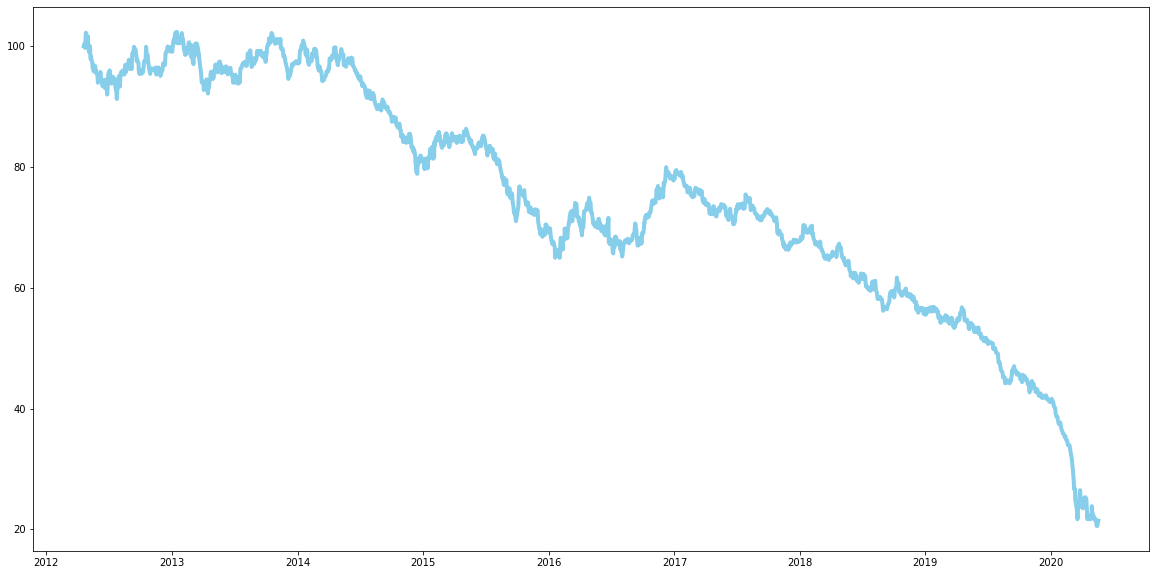

In [34]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Momentum'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='Momentum')

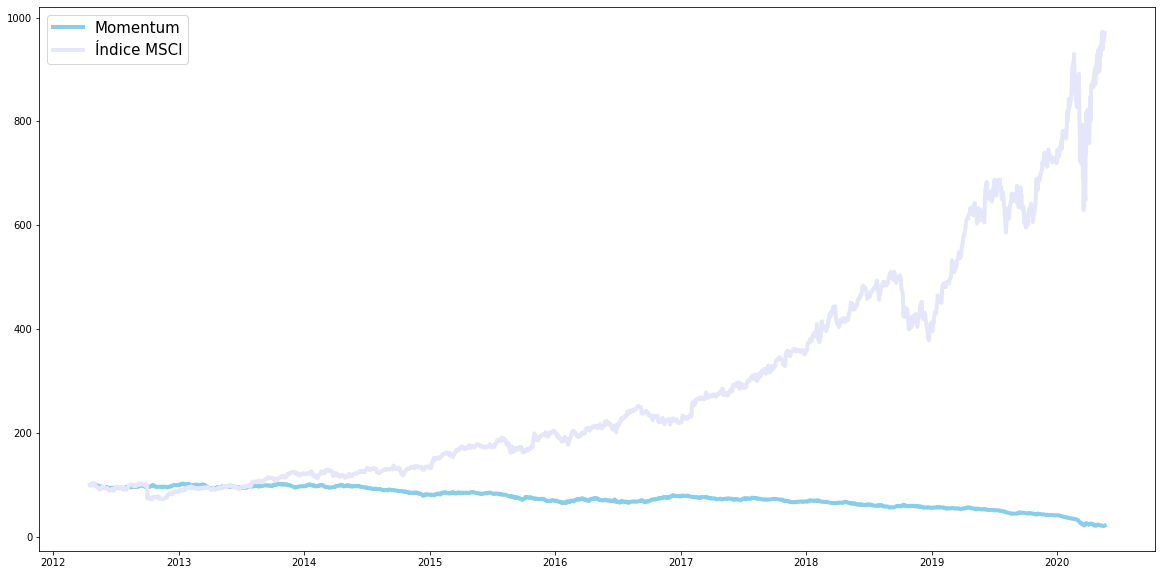

In [35]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Momentum'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='Momentum')
plt.plot(MSCI["Buy&Hold"], marker='', markerfacecolor='lavender', markersize=12, color='lavender', 
         linewidth=4, label ='Índice MSCI')
plt.legend(prop={"size":15}, loc="upper left")

## Conclusiones

Podemos concluir que la selección de pesos para los datos en cuestión es correcta (al aplicar el inverso, es decir, mayor peso al largo que al corto y viceversa, los resultados eran peores y la subida era mucho menos estable, es decir, que había más volatilidad). 

In [36]:
final.to_csv('Estrategia_Momentum_final.csv')